In [47]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
from scipy.optimize import curve_fit
import numpy as np

In [59]:
#Define a fucntion that we want to fit the data to
def func(x,y0,K,plateau):
    
    #plateau = 0
    return (y0 - plateau) * np.exp(-K * x) + plateau

# Non-Normalized Group Plots

y0 	 K 	 Plateau
[2.67899405 0.01074685 1.98885351]
[2.78188801 0.02388708 2.55127963]
[2.66439639 0.00266989 0.23195705]
[2.78716659 0.04400638 2.60901349]
[2.67559837 0.01955391 2.1698695 ]
[2.77893068 0.07385291 2.61476663]
[2.76517937 0.04154482 2.60900045]
[2.65823721 0.03203292 2.3906245 ]


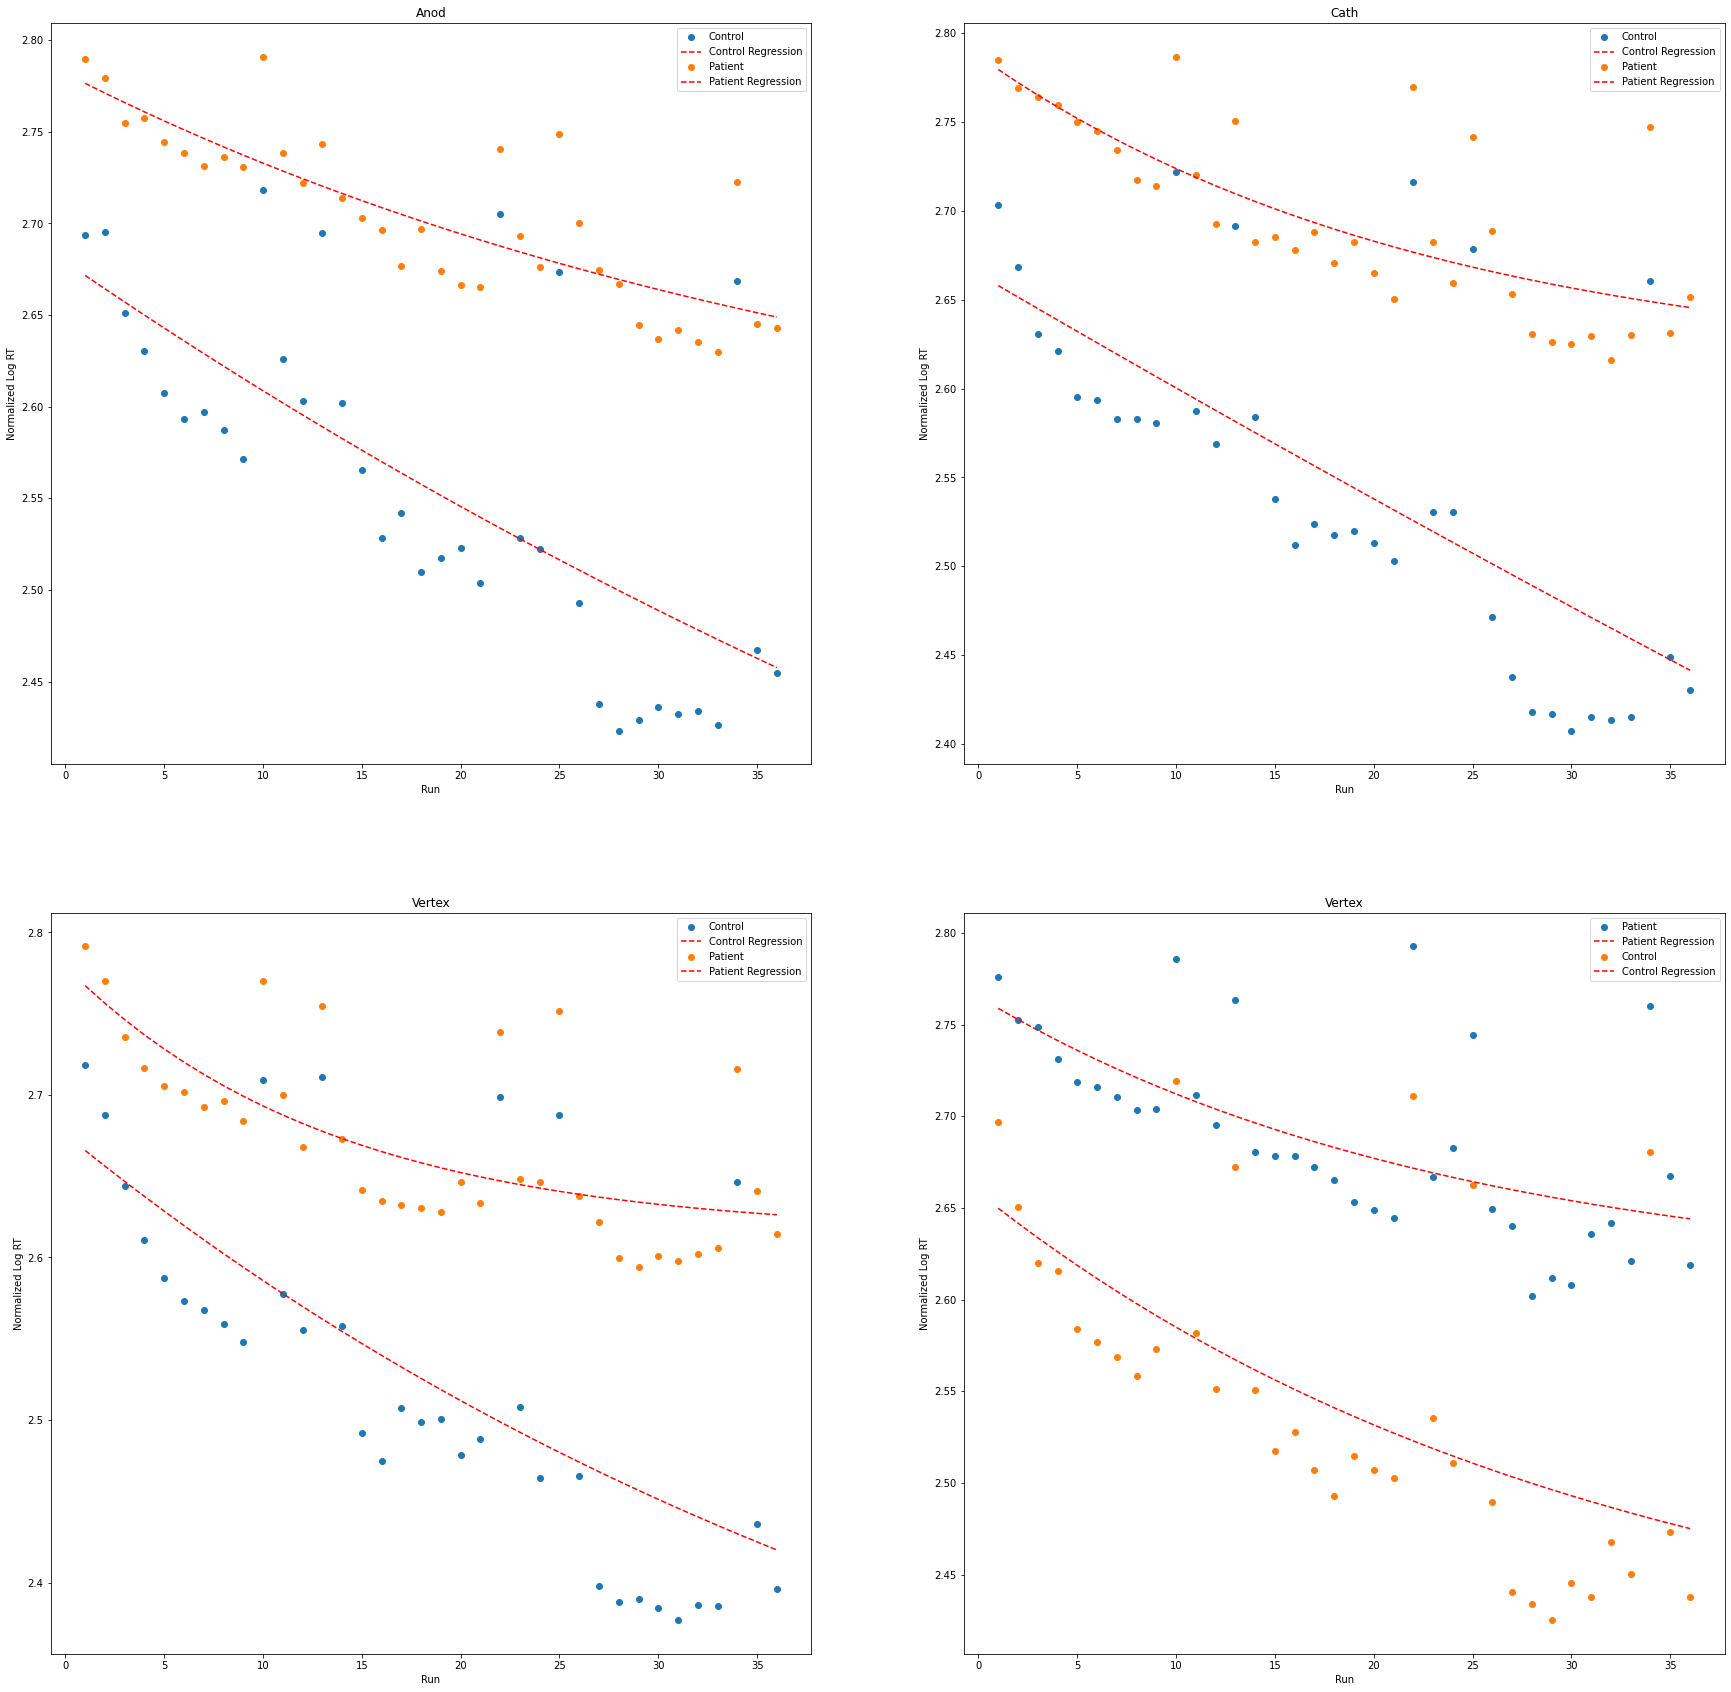

In [64]:
#list out the conditions
plt.figure(figsize=(30,30))
conditions = ['Sham','Anod','Cath','Vertex']
os.chdir("/Users/adish/Documents/NYPSI and NKI Research/TDCS-SRTT/data/WrangledData/SUBJECT_RUN/subjectRunAvgs/groupAverageLogRTs")
print("y0 \t K \t Plateau")
for i,c in enumerate(conditions):
    for f in os.listdir():
        if (c in f):
            #then we want to make the plot
            df = pd.read_csv(f)
            x = np.arange(1,len(df['GroupAvgLogRT'].values)+1,1)
            y = df['GroupAvgLogRT'].to_numpy()
            #Fit the curve
            popt, pcov = curve_fit(func, x, y)
  
            print(popt)
            #create a trend line
            trendline = func(x,popt[0],popt[1],popt[2])
            
            plt.title(c)
            plt.xlabel("Run")
            plt.ylabel("Normalized Log RT")
            plt.subplot(2,2,i+1)
            if "control".lower() in f.lower():
                plt.scatter(x,y,label="Control")
                plt.plot(x,trendline,'r--',label="Control Regression")
            else:
                plt.scatter(x,y,label="Patient")
                plt.plot(x,trendline,'r--',label="Patient Regression")
            plt.legend()
plt.savefig("GroupAverageLofRTPlot.png") 